In [1]:
import numpy as np
import pandas as pd
import astropy.io.fits as fits
import os
import sys
import glob

%matplotlib inline
import matplotlib.pyplot as plt

Read the fits event file

In [2]:
hdul = fits.open("scorefile_test.fits")
hdul.info()

events = hdul[1].data
print(events.columns)

t_ID = events['EventID']
t_ED = events['En_dep']
t_SI = events['Scint_ID']
t_XP = events['X_Primary']
t_YP = events['Y_Primary']
t_ZP = events['Z_Primary']
t_TP = events['Theta_Primary']
t_PP = events['Phi_Primary']
t_EP = events['En_Primary']
t_Dx = events['X_Detected']
t_Dy = events['Y_Detected']
t_Dz = events['Z_Detected']

Filename: scorefile_test.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  EVENTS        1 BinTableHDU     43   28920R x 12C   [1K, 1D, 1K, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   
ColDefs(
    name = 'EventID'; format = '1K'
    name = 'En_dep'; format = '1D'; unit = 'keV'
    name = 'Scint_ID'; format = '1K'
    name = 'X_Primary'; format = '1D'; unit = 'cm'
    name = 'Y_Primary'; format = '1D'; unit = 'cm'
    name = 'Z_Primary'; format = '1D'; unit = 'cm'
    name = 'Theta_Primary'; format = '1D'; unit = 'degree'
    name = 'Phi_Primary'; format = '1D'; unit = 'degree'
    name = 'En_Primary'; format = '1D'; unit = 'keV'
    name = 'X_Detected'; format = '1D'; unit = 'cm'
    name = 'Y_Detected'; format = '1D'; unit = 'cm'
    name = 'Z_Detected'; format = '1D'; unit = 'cm'
)


Print some value

In [3]:
print('Nr of records: {}'.format(len(t_ID)))
print(f'The first 100 scintitor IDs: {t_SI[0:99]}')

Nr of records: 28920
The first 100 scintitor IDs: [119 121 110 117  43 110 125 132 107 119 109 103  29  49 129 127  30  60
 118  14 105 114 115  38 101  13 130  44 116 109  27  51 128  44  44  21
 124  44 121 118   8  37 102 108  62  32  36 131   7 124 105  27  14 108
  54 122  59 106 127  56 114 132 118  47 128  14  29  55 127  31  57  18
  46  56 119 112   9 107 128  26 105  53  37  10   6  43 122 122 130 102
 115  31  20 106 113 118 131 130   3]


Create a pandas data frame

In [4]:
data = {'EventID': t_ID, 'En_dep': t_ED, 'Scint_ID': t_SI, 'X_Primary': t_XP, 'Y_Primary': t_YP, 'Z_Primary': t_ZP,
        'Theta_Primary': t_TP, 'Phi_Primary': t_PP, 'En_Primary': t_EP, 'X_Detected': t_Dx,
       'Y_Detected': t_Dy, 'Z_Detected': t_Dz}
df = pd.DataFrame(data)
df

,EventID,En_dep,Scint_ID,X_Primary,Y_Primary,Z_Primary,Theta_Primary,Phi_Primary,En_Primary,X_Detected,Y_Detected,Z_Detected
0,4,5.056252,119,-4.132852,3.552836,-8.0,180.0,0.0,60.0,-38.239151,33.041008,-32.883976
1,11,2.477170,121,-3.526051,-1.702573,-8.0,180.0,0.0,60.0,-23.639153,33.041008,-32.883976
2,31,16.710003,110,-5.447607,2.930470,-8.0,180.0,0.0,60.0,-52.989151,29.191009,-32.883976
3,32,6.967762,117,0.565933,3.307095,-8.0,180.0,0.0,60.0,5.560848,33.041008,-32.883976
4,33,10.179645,43,-1.022850,1.248501,-8.0,180.0,0.0,60.0,-10.564152,12.966008,-32.883976
...,...,...,...,...,...,...,...,...,...,...,...,...
28915,119980,0.539443,125,0.296321,-2.690902,-8.0,180.0,0.0,60.0,1.960848,-29.358992,-32.883976
28916,119987,9.390171,112,-5.543942,1.449417,-8.0,180.0,0.0,60.0,-52.989151,14.591008,-32.883976
28917,119993,5.986904,108,0.721955,-1.616525,-8.0,180.0,0.0,60.0,9.410848,-18.208992,-32.883976
28918,119995,15.710589,32,-3.005780,-1.814966,-8.0,180.0,0.0,60.0,-32.964151,-18.083993,-32.883976


### Select the Scattterer (Scint_ID < 100) elements

In [5]:
df[df['Scint_ID'] < 100]

,EventID,En_dep,Scint_ID,X_Primary,Y_Primary,Z_Primary,Theta_Primary,Phi_Primary,En_Primary,X_Detected,Y_Detected,Z_Detected
4,33,10.179645,43,-1.022850,1.248501,-8.0,180.0,0.0,60.0,-10.564152,12.966008,-32.883976
12,58,4.806444,29,-2.879811,-1.300441,-8.0,180.0,0.0,60.0,-28.614152,-13.733992,-32.883976
13,61,3.630105,49,-4.117036,0.706514,-8.0,180.0,0.0,60.0,-41.714151,8.616008,-32.883976
16,98,12.333551,30,-4.058802,-1.795932,-8.0,180.0,0.0,60.0,-41.664152,-18.083993,-32.883976
17,101,8.145701,60,-3.589378,1.154760,-8.0,180.0,0.0,60.0,-37.364151,12.966008,-32.883976
...,...,...,...,...,...,...,...,...,...,...,...,...
28912,119974,0.693893,40,-0.646253,1.901375,-8.0,180.0,0.0,60.0,-6.214152,17.316008,-32.883976
28913,119979,10.631016,2,-1.545164,-0.478998,-8.0,180.0,0.0,60.0,-14.964152,-5.033992,-32.883976
28914,119980,17.426425,16,0.296321,-2.690902,-8.0,180.0,0.0,60.0,-1.914152,-13.733992,-32.883976
28918,119995,15.710589,32,-3.005780,-1.814966,-8.0,180.0,0.0,60.0,-32.964151,-18.083993,-32.883976


Print the number of hits for each scaterer

In [6]:
for scatterer_ID in range(64):
   print(len(df[df['Scint_ID'] == scatterer_ID+1]))

207
200
169
183
193
178
199
178
201
216
196
176
179
192
187
217
184
197
230
213
176
202
211
189
206
186
185
177
196
202
197
200
177
196
174
189
190
203
177
190
188
196
190
206
205
205
181
175
205
182
202
186
240
213
184
189
192
188
189
207
207
193
192
193


In [7]:
# The first ID
df[df['Scint_ID'] == 1]

,EventID,En_dep,Scint_ID,X_Primary,Y_Primary,Z_Primary,Theta_Primary,Phi_Primary,En_Primary,X_Detected,Y_Detected,Z_Detected
141,658,15.234778,1,-1.354470,-1.083199,-8.0,180.0,0.0,60.0,-1.914152,-18.083993,-32.883976
183,807,1.388734,1,-0.195279,-1.799189,-8.0,180.0,0.0,60.0,-1.914152,-18.083993,-32.883976
718,3017,45.988500,1,-2.320282,2.914628,-8.0,180.0,0.0,60.0,-1.914152,-18.083993,-32.883976
790,3309,8.760478,1,-0.148438,-1.789637,-8.0,180.0,0.0,60.0,-1.914152,-18.083993,-32.883976
794,3322,0.079912,1,-0.055418,-1.672493,-8.0,180.0,0.0,60.0,-1.914152,-18.083993,-32.883976
...,...,...,...,...,...,...,...,...,...,...,...,...
28582,118634,0.677195,1,-3.785804,-1.231579,-8.0,180.0,0.0,60.0,-1.914152,-18.083993,-32.883976
28599,118707,11.823785,1,-0.767962,-1.664079,-8.0,180.0,0.0,60.0,-1.914152,-18.083993,-32.883976
28659,118909,11.138117,1,-0.074962,-1.767466,-8.0,180.0,0.0,60.0,-1.914152,-18.083993,-32.883976
28701,119128,10.447441,1,-0.329735,-1.715895,-8.0,180.0,0.0,60.0,-1.914152,-18.083993,-32.883976


In [8]:
df[df['Scint_ID'] == 1].iloc[0,:]

EventID          658.000000
En_dep            15.234778
Scint_ID           1.000000
X_Primary         -1.354470
Y_Primary         -1.083199
Z_Primary         -8.000000
Theta_Primary    180.000000
Phi_Primary        0.000000
En_Primary        60.000000
X_Detected        -1.914152
Y_Detected       -18.083993
Z_Detected       -32.883976
Name: 141, dtype: float64

Create the lookup table (Scint_ID, X_detected, Y_detected, Z_detected)

In [9]:
Scint_ID = []
X_Detected = []
Y_Detected = []
Z_Detected = []
for i in range(64):
    Scint_ID.append(int(df[df['Scint_ID'] == i+1].iloc[0,:]['Scint_ID']))
    X_Detected.append(df[df['Scint_ID'] == i+1].iloc[0,:]['X_Detected'])
    Y_Detected.append(df[df['Scint_ID'] == i+1].iloc[0,:]['Y_Detected'])
    Z_Detected.append(df[df['Scint_ID'] == i+1].iloc[0,:]['Z_Detected'])

# create the data frame
data = {'Scint_ID': Scint_ID, 'X_Detected': X_Detected, 'Y_Detected': Y_Detected,
       'Z_Detected': Z_Detected}
look_up_table = pd.DataFrame(data)
look_up_table

,Scint_ID,X_Detected,Y_Detected,Z_Detected
0,1,-1.914152,-18.083993,-32.883976
1,2,-14.964152,-5.033992,-32.883976
2,3,-14.964152,-9.383992,-32.883976
3,4,-14.964152,-13.733992,-32.883976
4,5,-14.964152,-18.083993,-32.883976
...,...,...,...,...
59,60,-37.364151,12.966008,-32.883976
60,61,-37.364151,8.616008,-32.883976
61,62,-41.714151,21.666007,-32.883976
62,63,-41.714151,17.316008,-32.883976


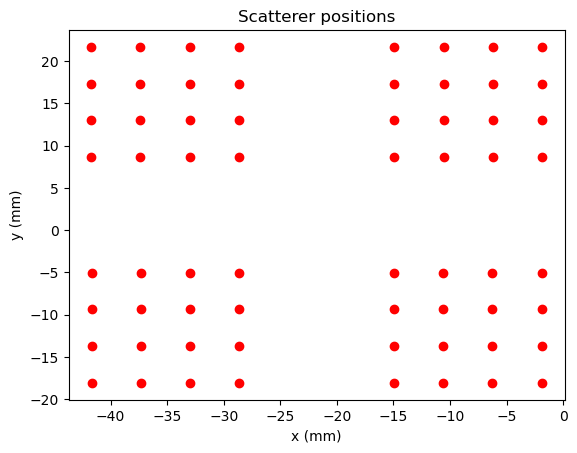

In [10]:
position_x = []
position_y = []
for i in range(len(look_up_table)):
    position_x.append(look_up_table.iloc[i,1])
    position_y.append(look_up_table.iloc[i,2])

plt.title('Scatterer positions')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')    
plt.plot(position_x, position_y, 'o', color='red');

### Select the absorber (Scint_ID > 100) elements

In [11]:
df[df['Scint_ID'] > 100]

,EventID,En_dep,Scint_ID,X_Primary,Y_Primary,Z_Primary,Theta_Primary,Phi_Primary,En_Primary,X_Detected,Y_Detected,Z_Detected
0,4,5.056252,119,-4.132852,3.552836,-8.0,180.0,0.0,60.0,-38.239151,33.041008,-32.883976
1,11,2.477170,121,-3.526051,-1.702573,-8.0,180.0,0.0,60.0,-23.639153,33.041008,-32.883976
2,31,16.710003,110,-5.447607,2.930470,-8.0,180.0,0.0,60.0,-52.989151,29.191009,-32.883976
3,32,6.967762,117,0.565933,3.307095,-8.0,180.0,0.0,60.0,5.560848,33.041008,-32.883976
5,35,1.656847,110,-5.109432,2.793536,-8.0,180.0,0.0,60.0,-52.989151,29.191009,-32.883976
...,...,...,...,...,...,...,...,...,...,...,...,...
28910,119974,12.441993,104,-0.646253,1.901375,-8.0,180.0,0.0,60.0,9.410848,10.991008,-32.883976
28911,119974,0.685657,124,-0.646253,1.901375,-8.0,180.0,0.0,60.0,-1.739152,33.041008,-32.883976
28915,119980,0.539443,125,0.296321,-2.690902,-8.0,180.0,0.0,60.0,1.960848,-29.358992,-32.883976
28916,119987,9.390171,112,-5.543942,1.449417,-8.0,180.0,0.0,60.0,-52.989151,14.591008,-32.883976


Print the number of hits for each absorber

In [12]:
for scatterer_ID in range(32):
   print(len(df[df['Scint_ID'] == scatterer_ID+101]))

529
500
487
539
533
516
523
487
497
489
494
528
559
531
504
555
501
498
539
512
525
461
497
517
533
535
522
511
543
512
531
486


In [13]:
# The first ID
df[df['Scint_ID'] == 101]

,EventID,En_dep,Scint_ID,X_Primary,Y_Primary,Z_Primary,Theta_Primary,Phi_Primary,En_Primary,X_Detected,Y_Detected,Z_Detected
24,139,12.690268,101,1.033135,-2.675130,-8.0,180.0,0.0,60.0,9.410848,-25.508993,-32.883976
116,562,1.305911,101,0.934175,-2.764350,-8.0,180.0,0.0,60.0,9.410848,-25.508993,-32.883976
159,705,8.206998,101,0.827005,-2.417859,-8.0,180.0,0.0,60.0,9.410848,-25.508993,-32.883976
168,748,7.338538,101,1.041581,-2.221649,-8.0,180.0,0.0,60.0,9.410848,-25.508993,-32.883976
219,941,2.950957,101,0.909424,-2.310707,-8.0,180.0,0.0,60.0,9.410848,-25.508993,-32.883976
...,...,...,...,...,...,...,...,...,...,...,...,...
28396,117959,4.508356,101,0.932286,-2.828504,-8.0,180.0,0.0,60.0,9.410848,-25.508993,-32.883976
28486,118304,59.973460,101,0.692974,-2.215966,-8.0,180.0,0.0,60.0,9.410848,-25.508993,-32.883976
28504,118360,3.212494,101,1.096293,-2.662071,-8.0,180.0,0.0,60.0,9.410848,-25.508993,-32.883976
28508,118369,4.019964,101,0.848341,-2.308396,-8.0,180.0,0.0,60.0,9.410848,-25.508993,-32.883976


In [14]:
df[df['Scint_ID'] == 101].iloc[0,:]

EventID          139.000000
En_dep            12.690268
Scint_ID         101.000000
X_Primary          1.033135
Y_Primary         -2.675130
Z_Primary         -8.000000
Theta_Primary    180.000000
Phi_Primary        0.000000
En_Primary        60.000000
X_Detected         9.410848
Y_Detected       -25.508993
Z_Detected       -32.883976
Name: 24, dtype: float64

Create the lookup table (Scint_ID, X_detected, Y_detected, Z_detected)

In [15]:
Scint_ID = []
X_Detected = []
Y_Detected = []
Z_Detected = []
for i in range(32):
    Scint_ID.append(int(df[df['Scint_ID'] == i+101].iloc[0,:]['Scint_ID']))
    X_Detected.append(df[df['Scint_ID'] == i+101].iloc[0,:]['X_Detected'])
    Y_Detected.append(df[df['Scint_ID'] == i+101].iloc[0,:]['Y_Detected'])
    Z_Detected.append(df[df['Scint_ID'] == i+101].iloc[0,:]['Z_Detected'])

# create the data frame
data = {'Scint_ID': Scint_ID, 'X_Detected': X_Detected, 'Y_Detected': Y_Detected,
       'Z_Detected': Z_Detected}
look_up_table = pd.DataFrame(data)
look_up_table

,Scint_ID,X_Detected,Y_Detected,Z_Detected
0,101,9.410848,-25.508993,-32.883976
1,102,9.410848,25.591007,-32.883976
2,103,9.410848,18.291008,-32.883976
3,104,9.410848,10.991008,-32.883976
4,105,9.410848,3.691008,-32.883976
5,106,9.410848,-3.608992,-32.883976
6,107,9.410848,-10.908992,-32.883976
7,108,9.410848,-18.208992,-32.883976
8,109,-52.989151,-21.908993,-32.883976
9,110,-52.989151,29.191009,-32.883976


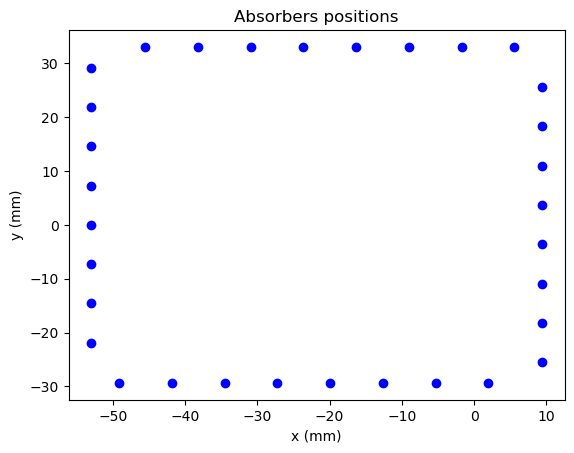

In [19]:
position_x = []
position_y = []
for i in range(len(look_up_table)):
    position_x.append(look_up_table.iloc[i,1])
    position_y.append(look_up_table.iloc[i,2])

plt.title('Absorbers positions')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')    
plt.plot(position_x, position_y, 'o', color='blue');

### The energy distribution

In [17]:
# Group by ''EventID' column 
grouped = df.groupby('EventID')

# Perform aggregation
sum_by_category = grouped['En_dep'].sum()

sum_by_category

EventID
4          5.056252
11         2.477170
31        16.710003
32         6.967762
33        10.179645
            ...    
119979    10.631016
119980    17.965868
119987     9.390171
119993     5.986904
119995    15.983639
Name: En_dep, Length: 24869, dtype: float64

Plot the spectrum

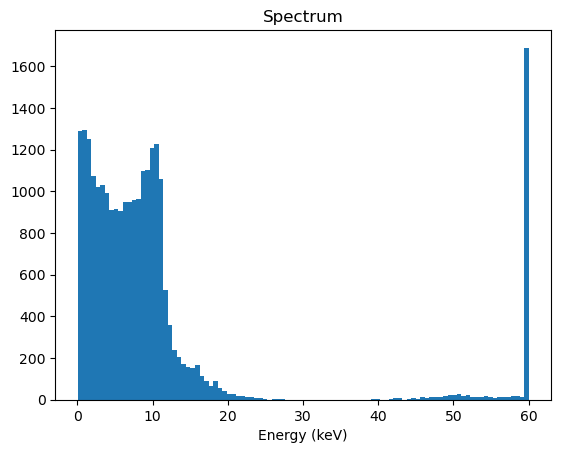

In [18]:
plt.hist(sum_by_category, bins=100);
plt.title('Spectrum');
plt.xlabel('Energy (keV)');